In [1]:
%matplotlib inline
import torch
from d2l import torch as d2l

在批量梯度下降中参数数更新公式为

$$
\theta_{t+1} = \theta_{t} - \eta \nabla f(\theta_t)
$$

其缺点在于，参数在陡峭方向来回振荡，收敛慢；并且学习率太大会发散，太小导致收敛慢；梯度会收到噪声的影响，方向抖动

---

引入一个速度向量$v_t$累积梯度历史：

$$
\begin{aligned}

v_{t+1} &= \beta v_t - \eta \nabla f(\theta_t)\\
\theta_{t+1} &= \theta_t + v_{t+1}\\

\end{aligned}
$$

其中$v_t$为当前“速度”，对应加权累积的更新方向，$\beta$为动量系数.

> $\beta v_t$保留上一步的更新方向（惯性）

epoch 20, x1: -2.210012, x2: -0.000000


c:\Software\Anaconda\envs\d2l\lib\site-packages\torch\functional.py:554: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\pytorch\aten\src\ATen\native\TensorShape.cpp:4324.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


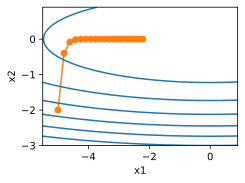

In [2]:
eta = 0.2
def f_2d(x1, x2):
    return 0.1 * x1 ** 2 + 2 * x2 ** 2
def gd_2d(x1, x2, s1, s2):
    return (x1 - eta * 0.2 * x1, x2 - eta * 4 * x2, 0, 0)

d2l.show_trace_2d(f_2d, d2l.train_2d(gd_2d))

epoch 20, x1: -0.943467, x2: -0.000073


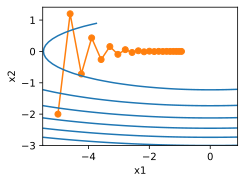

In [3]:
eta = 0.4
d2l.show_trace_2d(f_2d, d2l.train_2d(gd_2d))

epoch 20, x1: -0.289993, x2: 0.001723


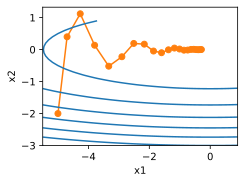

In [4]:
def momentum_2d(x1, x2, v1, v2):
    v1 = beta * v1 + 0.2 * x1
    v2 = beta * v2 + 4 * x2
    return x1 - eta * v1, x2 - eta * v2, v1, v2

eta, beta = 0.3, 0.5
d2l.show_trace_2d(f_2d, d2l.train_2d(momentum_2d))

epoch 20, x1: -0.607883, x2: -2.000000


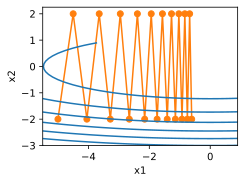

In [5]:
eta, beta = 0.5, 0
d2l.show_trace_2d(f_2d, d2l.train_2d(momentum_2d))

epoch 20, x1: -0.256209, x2: -0.000003


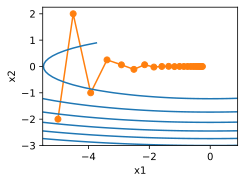

In [6]:
eta, beta = 0.5, 0.25
d2l.show_trace_2d(f_2d, d2l.train_2d(momentum_2d))

绘制$\beta^t$的衰减曲线，表示不同的$\beta$对历史信息保留时间的影响。

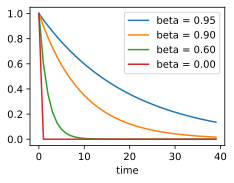

In [7]:
d2l.set_figsize()
betas = [0.95, 0.9, 0.6, 0]
for beta in betas:
    x = torch.arange(40).detach().numpy()
    d2l.plt.plot(x, beta ** x, label=f'beta = {beta:.2f}')
d2l.plt.xlabel('time')
d2l.plt.legend();

---

In [8]:
def init_momentum_states(feature_dim):
    v_w = torch.zeros((feature_dim, 1))
    v_b = torch.zeros(1)
    return (v_w, v_b)

In [9]:
def sgd_momentum(params, states, hyperparams):
    for p, v in zip(params, states):
        with torch.no_grad():
            v[:] = hyperparams['momentum'] * v + p.grad
            p[:] -= hyperparams['lr'] * v
        p.grad.data.zero_()

loss: 0.242, 0.005 sec/epoch


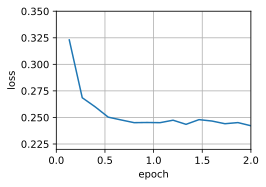

In [10]:
def train_momentum(lr, momentum, num_epochs=2):
    d2l.train_ch11(sgd_momentum, init_momentum_states(feature_dim),
                   {'lr': lr, 'momentum': momentum}, data_iter,
                   feature_dim, num_epochs)

data_iter, feature_dim = d2l.get_data_ch11(batch_size=10)
train_momentum(0.02, 0.5)

loss: 0.255, 0.006 sec/epoch


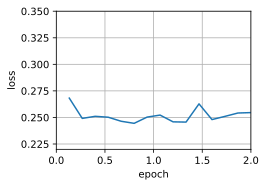

In [11]:
train_momentum(0.01, 0.9)

loss: 0.243, 0.005 sec/epoch


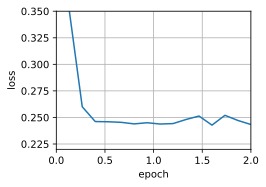

In [12]:
train_momentum(0.005, 0.9)

loss: 0.247, 0.005 sec/epoch


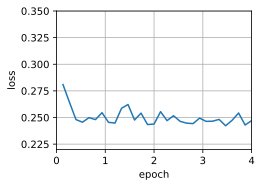

In [13]:
trainer = torch.optim.SGD
d2l.train_concise_ch11(trainer, {'lr': 0.005, 'momentum': 0.9}, data_iter)

---

最小化$f(x) = \dfrac{\lambda}{2}x^2$

梯度为$\nabla f(x) = \lambda x$，则$x_{t} = (1 - \eta\lambda)^t x_{0}$

当$\lambda$较小时，收敛较慢，适中，收敛更快，当$\lambda$过大时，曲线振荡或发散。

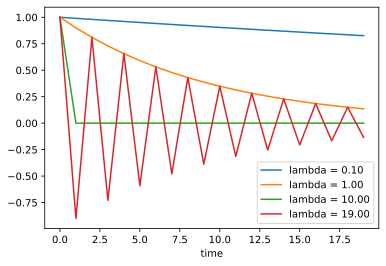

In [14]:
lambdas = [0.1, 1, 10, 19]
eta = 0.1
d2l.set_figsize((6, 4))
for lam in lambdas:
    t = torch.arange(20).detach().numpy()
    d2l.plt.plot(t, (1 - eta * lam) ** t, label=f'lambda = {lam:.2f}')
d2l.plt.xlabel('time')
d2l.plt.legend()